In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D, ZeroPadding2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD



In [5]:
pip install tensorflow-gpu==2.0.0-rc0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tensorflow_core\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [24]:
img_width=64
img_height=64

In [25]:
datagen=ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [61]:
train_data_generator=datagen.flow_from_directory(directory='cell_images', target_size=(img_width,img_height), class_mode='binary', batch_size=16, subset='training')

Found 22048 images belonging to 2 classes.


In [62]:
validation_data_generator=datagen.flow_from_directory(directory='cell_images', target_size=(img_width,img_height), class_mode='binary', batch_size=16, subset='validation')

Found 5510 images belonging to 2 classes.


In [31]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
model=Sequential()
#filter=16
#filter_size=3,3
#flatten layer is used to convert multidimentional data into vector
model.add(Conv2D( 16, (3,3), input_shape=(img_width,img_height,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D( 32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))



In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)             

In [65]:
opt = SGD(lr=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])



In [66]:
history=model.fit_generator(generator=train_data_generator, steps_per_epoch=len(train_data_generator), epochs=5,validation_data=validation_data_generator, validation_steps=len(validation_data_generator))

Epoch 1/5
1378/1378 [==============================] - 611s 443ms/step - loss: 0.6792 - accuracy: 0.5695 - val_loss: 0.6438 - val_accuracy: 0.6842
Epoch 2/5
1378/1378 [==============================] - 203s 148ms/step - loss: 0.6377 - accuracy: 0.6401 - val_loss: 0.5908 - val_accuracy: 0.7076
Epoch 3/5
 301/1378 [=====>........................] - ETA: 2:28 - loss: 0.6078 - accuracy: 0.6782

KeyboardInterrupt: 

In [20]:
history.history

{'loss': [0.47741710373534346, 0.22638704591932204, 0.20336288522661317],
 'accuracy': [0.77435595, 0.92856497, 0.93731856],
 'val_loss': [0.22570067335298097, 0.19248692828999914, 0.1897249898130911],
 'val_accuracy': [0.9245009, 0.93520874, 0.9415608]}

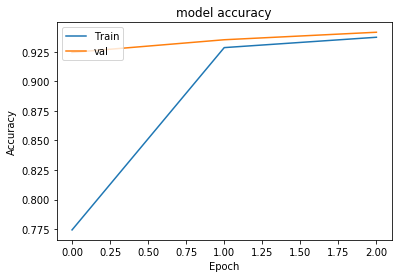

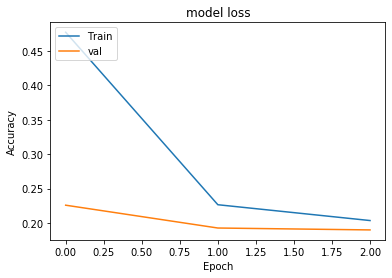

In [21]:
#plot of accuracy and other mertics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

#for validation loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()